In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from PIL import Image

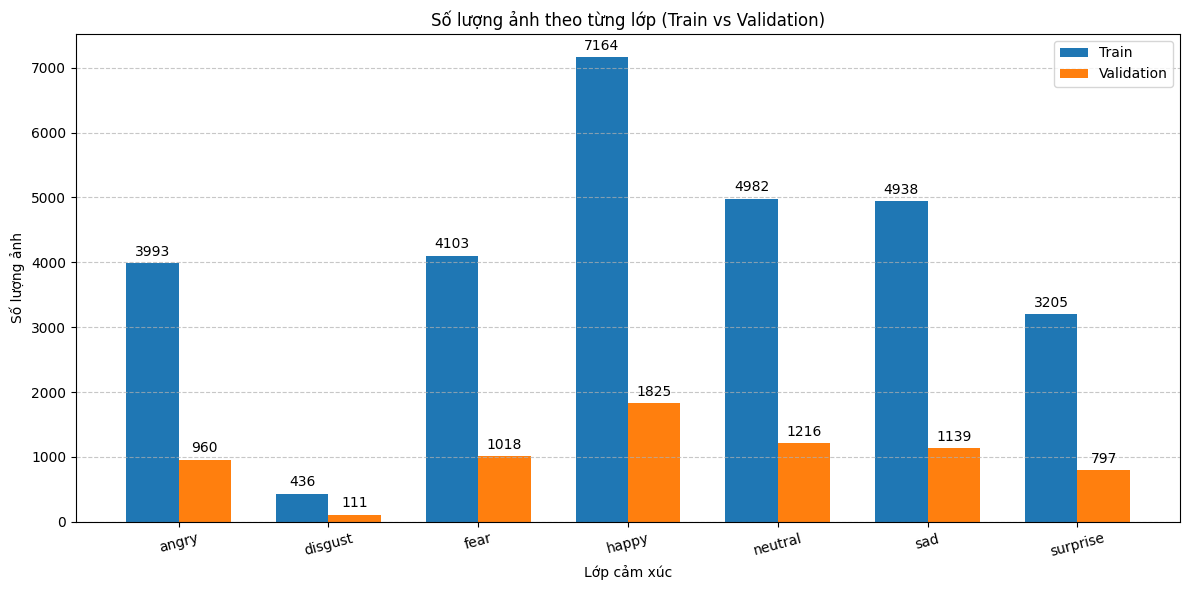

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ƒê∆∞·ªùng d·∫´n
train_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/train'
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

# L·∫•y danh s√°ch l·ªõp
classes = os.listdir(train_dir)
train_counts = []
val_counts = []

# ƒê·∫øm ·∫£nh
for cls in classes:
    train_path = os.path.join(train_dir, cls)
    val_path = os.path.join(val_dir, cls)

    train_count = len(os.listdir(train_path)) if os.path.exists(train_path) else 0
    val_count = len(os.listdir(val_path)) if os.path.exists(val_path) else 0

    train_counts.append(train_count)
    val_counts.append(val_count)

# V·∫Ω bi·ªÉu ƒë·ªì
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, train_counts, width, label='Train')
rects2 = ax.bar(x + width/2, val_counts, width, label='Validation')

ax.set_ylabel('S·ªë l∆∞·ª£ng ·∫£nh')
ax.set_xlabel('L·ªõp c·∫£m x√∫c')
ax.set_title('S·ªë l∆∞·ª£ng ·∫£nh theo t·ª´ng l·ªõp (Train vs Validation)')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng tr√™n ƒë·∫ßu m·ªói c·ªôt
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 ƒëi·ªÉm pixel l√™n tr√™n
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [4]:
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ƒê∆∞·ªùng d·∫´n
train_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/train'
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'

# T·∫°o c√°c generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# T·∫°o c√°c generator cho train v√† validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(56, 56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(56, 56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# L∆∞u th√¥ng tin v·ªÅ generator v√†o file JSON
generator_info = {
    "train_generator": {
        "target_size": train_generator.target_size,
        "color_mode": train_generator.color_mode,
        "batch_size": train_generator.batch_size,
        "class_mode": train_generator.class_mode,
        "num_classes": len(train_generator.class_indices),
        "class_labels": list(train_generator.class_indices.keys())
    },
    "validation_generator": {
        "target_size": validation_generator.target_size,
        "color_mode": validation_generator.color_mode,
        "batch_size": validation_generator.batch_size,
        "class_mode": validation_generator.class_mode,
        "num_classes": len(validation_generator.class_indices),
        "class_labels": list(validation_generator.class_indices.keys())
    }
}

# L∆∞u v√†o file JSON
with open('generator_info.json', 'w') as json_file:
    json.dump(generator_info, json_file, indent=4)

print("File generator_info.json ƒë√£ ƒë∆∞·ª£c t·∫°o!")

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
File generator_info.json ƒë√£ ƒë∆∞·ª£c t·∫°o!


In [5]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# Kh·ªüi t·∫°o m√¥ h√¨nh CNN (Convolutional Neural Network)
model = Sequential()

# 1 - L·ªõp t√≠ch ch·∫≠p (Convolution Layer)
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(56, 56, 1)))  # L·ªõp t√≠ch ch·∫≠p v·ªõi 64 b·ªô l·ªçc k√≠ch th∆∞·ªõc 3x3, padding='same' gi·ªØ k√≠ch th∆∞·ªõc ·∫£nh
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra c·ªßa l·ªõp t√≠ch ch·∫≠p
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # L·ªõp pooling v·ªõi k√≠ch th∆∞·ªõc c·ª≠a s·ªï 2x2 ƒë·ªÉ gi·∫£m k√≠ch th∆∞·ªõc ·∫£nh
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25% ƒë·ªÉ gi·∫£m overfitting

# L·ªõp t√≠ch ch·∫≠p th·ª© 2
model.add(Conv2D(128, (5, 5), padding='same'))  # L·ªõp t√≠ch ch·∫≠p v·ªõi 128 b·ªô l·ªçc k√≠ch th∆∞·ªõc 5x5
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling v·ªõi k√≠ch th∆∞·ªõc c·ª≠a s·ªï 2x2
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25%

# L·ªõp t√≠ch ch·∫≠p th·ª© 3
model.add(Conv2D(512, (3, 3), padding='same'))  # L·ªõp t√≠ch ch·∫≠p v·ªõi 512 b·ªô l·ªçc k√≠ch th∆∞·ªõc 3x3
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling v·ªõi k√≠ch th∆∞·ªõc c·ª≠a s·ªï 2x2
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25%

# L·ªõp t√≠ch ch·∫≠p th·ª© 4
model.add(Conv2D(512, (3, 3), padding='same'))  # L·ªõp t√≠ch ch·∫≠p v·ªõi 512 b·ªô l·ªçc k√≠ch th∆∞·ªõc 3x3
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pooling v·ªõi k√≠ch th∆∞·ªõc c·ª≠a s·ªï 2x2
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25%

# L√†m ph·∫≥ng (Flatten) ƒë·∫ßu ra t·ª´ c√°c l·ªõp tr∆∞·ªõc ƒë·ªÉ chuy·ªÉn sang c√°c l·ªõp Fully Connected (FC)
model.add(Flatten())

# L·ªõp Fully Connected ƒë·∫ßu ti√™n
model.add(Dense(256))  # L·ªõp Dense v·ªõi 256 ƒë∆°n v·ªã
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25%

# L·ªõp Fully Connected th·ª© hai
model.add(Dense(512))  # L·ªõp Dense v·ªõi 512 ƒë∆°n v·ªã
model.add(BatchNormalization())  # Chu·∫©n h√≥a ƒë·∫ßu ra
model.add(Activation('relu'))  # √Åp d·ª•ng h√†m k√≠ch ho·∫°t ReLU
model.add(Dropout(0.25))  # √Åp d·ª•ng Dropout v·ªõi t·ª∑ l·ªá 25%

# L·ªõp output (L·ªõp ƒë·∫ßu ra) v·ªõi 7 ƒë∆°n v·ªã (7 l·ªõp c·∫£m x√∫c), h√†m k√≠ch ho·∫°t softmax
model.add(Dense(7, activation='softmax'))

# In th√¥ng tin v·ªÅ m√¥ h√¨nh
print(model.summary())

# Bi√™n d·ªãch m√¥ h√¨nh v·ªõi Adam optimizer v√† learning rate = 0.0001, h√†m m·∫•t m√°t l√† categorical_crossentropy
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


c:\Program Files\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 56, 56, 64)     ‚îÇ           640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 56, 56, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation (Activation)         ‚îÇ (None, 56, 56, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 28, 28, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 28, 28, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 28, 28, 128)    ‚îÇ       204,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 28, 28, 128)    ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ activation_1 (Activation)       ‚îÇ (None, 28, 28, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 14, 14, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 14, 14, 128)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 14, 14, 512)    ‚îÇ       590,336 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LambdaCallback
import math
# ƒê·ªãnh nghƒ©a EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Theo d√µi s·ª± thay ƒë·ªïi c·ªßa loss tr√™n validation
    patience=10,             # S·ªë epoch m√† m√¥ h√¨nh c√≥ th·ªÉ kh√¥ng c·∫£i thi·ªán tr∆∞·ªõc khi d·ª´ng
    verbose=1,               # Hi·ªÉn th·ªã th√¥ng tin khi d·ª´ng
    restore_best_weights=True # Kh√¥i ph·ª•c tr·ªçng s·ªë t·ªët nh·∫•t khi d·ª´ng s·ªõm
)

# ƒê·ªãnh nghƒ©a ModelCheckpoint ƒë·ªÉ l∆∞u tr·ªçng s·ªë t·ªët nh·∫•t v·ªõi ph·∫ßn m·ªü r·ªông .h5.keras
checkpoint = ModelCheckpoint(
    "model_weights.h5.keras", 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max'
)

# ƒê·ªãnh nghƒ©a ModelCheckpoint ƒë·ªÉ l∆∞u to√†n b·ªô m√¥ h√¨nh v·ªõi ph·∫ßn m·ªü r·ªông .keras
model_save_checkpoint = ModelCheckpoint(
    "model_full_keras.keras",  # T√™n t·ªáp ƒë·ªÉ l∆∞u m√¥ h√¨nh d∆∞·ªõi ƒë·ªãnh d·∫°ng .keras
    save_best_only=True,       # L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
    monitor='val_accuracy',    # Theo d√µi ƒë·ªô ch√≠nh x√°c tr√™n validation
    verbose=1,
    save_weights_only=False,   # L∆∞u to√†n b·ªô m√¥ h√¨nh, bao g·ªìm c·∫£ c·∫•u tr√∫c v√† tr·ªçng s·ªë
    mode='max'
)

# Callback ƒë·ªÉ in s·ªë epoch sau m·ªói epoch
epoch_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}/{epochs} finished, val_loss: {logs['val_loss']}, val_accuracy: {logs['val_accuracy']}"),
)

# Danh s√°ch c√°c callback
callbacks_list = [checkpoint, early_stopping, epoch_callback, model_save_checkpoint]

# S·ªë l∆∞·ª£ng epoch hu·∫•n luy·ªán
epochs = 20


# T√≠nh to√°n steps_per_epoch v√† validation_steps
steps_per_epoch = math.ceil(train_generator.n / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.n / validation_generator.batch_size)

# Hu·∫•n luy·ªán m√¥ h√¨nh
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # S·ª≠ d·ª•ng gi√° tr·ªã ƒë√£ l√†m tr√≤n
    epochs=epochs,  # S·ªë epoch
    validation_data=validation_generator,
    validation_steps=validation_steps,  # S·ª≠ d·ª•ng gi√° tr·ªã ƒë√£ l√†m tr√≤n
    callbacks=callbacks_list,
    verbose=1  # Hi·ªÉn th·ªã th√¥ng tin v·ªÅ m·ªói epoch
)

# Sau khi hu·∫•n luy·ªán ho√†n t·∫•t, l∆∞u m√¥ h√¨nh ho√†n ch·ªânh (c·∫•u tr√∫c + tr·ªçng s·ªë) v√†o file .keras
model.save("CNN_model_emotion_perfect.keras")  # L∆∞u m√¥ h√¨nh ho√†n ch·ªânh v√†o file v·ªõi ƒë·ªãnh d·∫°ng .keras
print("M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u v·ªõi ƒë·ªãnh d·∫°ng .keras")


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
451/451 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 959ms/step - accuracy: 0.2146 - loss: 2.1031
Epoch 1: val_accuracy improved from -inf to 0.25856, saving model to model_weights.h5.keras
Epoch 1/20 finished, val_loss: 1.824739933013916, val_accuracy: 0.2585621178150177

Epoch 1: val_accuracy improved from -inf to 0.25856, saving model to model_full_keras.keras
451/451 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 454s 1000ms/step - accuracy: 0.2146 - loss: 2.1029 - val_accuracy: 0.2586 - val_loss: 1.8247
Epoch 2/20
451/451 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 729ms/step - accuracy: 0.2379 - loss: 1.9022
Epoch 2: val_accuracy improved from 0.25856 to 0.29677, saving model to model_weights.h5.keras
Epoch 2/20 finished, val_loss: 1.7436901330947876, val_accuracy: 0.2967732846736908

Epoch 2: val_accuracy improved from 0.25856 to 0.29677, saving model to model_full_keras.keras
451/451 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

KeyboardInterrupt: 

111/111 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 156ms/step

üìã Classification Report:
              precision    recall  f1-score   support

       angry       0.46      0.57      0.51       960
     disgust       0.55      0.32      0.41       111
        fear       0.51      0.20      0.28      1018
       happy       0.83      0.84      0.84      1825
     neutral       0.49      0.69      0.57      1216
         sad       0.50      0.39      0.44      1139
    surprise       0.65      0.80      0.72       797

    accuracy                           0.60      7066
   macro avg       0.57      0.54      0.54      7066
weighted avg       0.60      0.60      0.58      7066



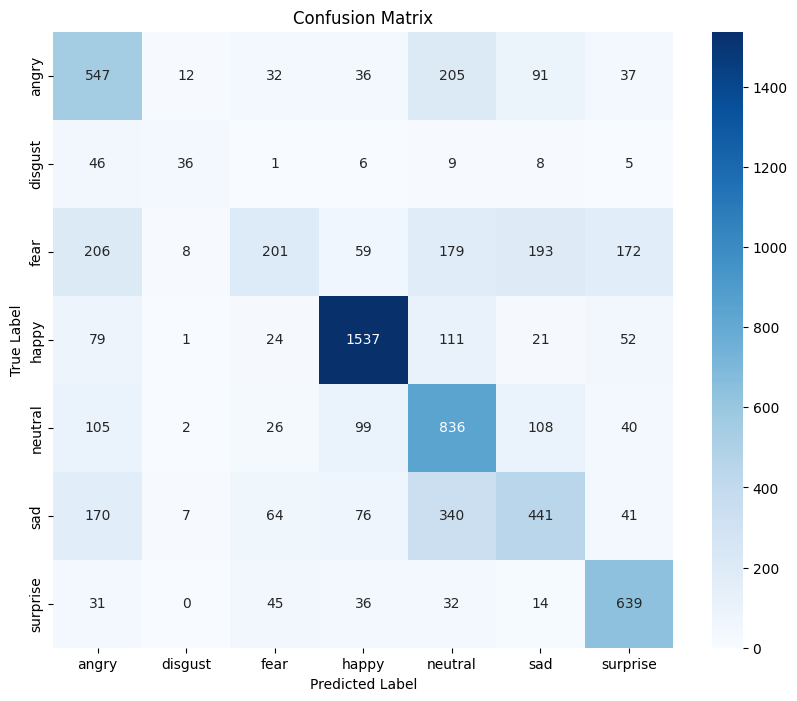

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# üß© B∆∞·ªõc 1: Predict tr√™n to√†n b·ªô validation set
# (c·∫©n th·∫≠n, ph·∫£i predict theo batch)

# D·ª± ƒëo√°n x√°c su·∫•t (y_pred_prob) v√† l·∫•y ra class d·ª± ƒëo√°n (y_pred_class)
y_pred_prob = model.predict(validation_generator, steps=validation_steps, verbose=1)
y_pred_class = np.argmax(y_pred_prob, axis=1)

# üß© B∆∞·ªõc 2: L·∫•y ground truth (nh√£n th·∫≠t)
# validation_generator.classes l√† list c√°c nh√£n th·∫≠t
y_true = validation_generator.classes

# üß© B∆∞·ªõc 3: In Classification Report
target_names = list(validation_generator.class_indices.keys())

print("\nüìã Classification Report:")
print(classification_report(y_true, y_pred_class, target_names=target_names))

# üß© B∆∞·ªõc 4: V·∫Ω Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load l·∫°i m√¥ h√¨nh
model = load_model("full_model_notEarlyStopPart2.keras")

# Ki·ªÉm tra input shape
print("Input shape c·ªßa model:", model.input_shape)

# N·∫øu model c·∫ßn nhi·ªÅu channel (RGB, v.v.)
expected_channels = model.input_shape[-1]
color_mode = "grayscale" if expected_channels == 1 else "rgb"

# Data preprocessing gi·ªëng nh∆∞ khi train
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'D:/DatasetDoAnCoSO/dataset_emotion/images/validation',
    target_size=(56, 56),
    color_mode=color_mode,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# ƒê√°nh gi√° m√¥ h√¨nh (val_loss v√† val_accuracy)
results = model.evaluate(test_generator, verbose=1)
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Input shape c·ªßa model: (None, 56, 56, 1)
Found 7066 images belonging to 7 classes.


c:\Program Files\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60s 536ms/step - accuracy: 0.6394 - loss: 1.2390
loss: 1.0881
compile_metrics: 0.6877


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load model
model = load_model("full_model_notEarlyStopPart2.keras")

# Ki·ªÉm tra input shape
print("üìê Input shape c·ªßa model:", model.input_shape)

# T·∫°o generator cho validation
val_dir = 'D:/DatasetDoAnCoSO/dataset_emotion/images/validation'
val_datagen = ImageDataGenerator(rescale=1.0/255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(56, 56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# ƒê√°nh gi√° model
results = model.evaluate(val_generator, verbose=0)
metrics_names = model.metrics_names
metrics_dict = dict(zip(metrics_names, results))

print("üìä Danh s√°ch metric ƒë∆∞·ª£c l∆∞u trong model:", metrics_names)
print("üéØ K·∫øt qu·∫£ ƒë√°nh gi√° tr√™n t·∫≠p validation:")

# In t·ª´ng metric ra r√µ r√†ng
for name, value in metrics_dict.items():
    print(f"üîπ {name}: {value:.4f}")


üìê Input shape c·ªßa model: (None, 56, 56, 1)
Found 7066 images belonging to 7 classes.
üìä Danh s√°ch metric ƒë∆∞·ª£c l∆∞u trong model: ['loss', 'compile_metrics']
üéØ K·∫øt qu·∫£ ƒë√°nh gi√° tr√™n t·∫≠p validation:
üîπ loss: 1.0881
üîπ compile_metrics: 0.6877
